# Analysis Content
* Loading Libraries
* Create Dataset
* Outlier Detection
* Initial Model Creation
* Outlier Treatment
* Re-train Model
Comparison of Models

# Loading Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.stats.mstats import winsorize
from scipy.stats import zscore


# Create Dataset with Outliers

In [39]:
# Creating the dataset
np.random.seed(42)
X = np.random.normal(loc=50, scale=10, size=100)  # Mean 50, standard deviation 10
y = 3 * X + np.random.normal(loc=0, scale=5, size=100)  # Linear relationship

# Adding outliers
X_outliers = np.random.uniform(low=80, high=200, size=40)  # Outliers
y_outliers = 3 * X_outliers + np.random.uniform(low=200, high=500, size=40)  # Outlier target values

# Merging the data
X = np.concatenate([X, X_outliers])
y = np.concatenate([y, y_outliers])

# Creating the dataframe
data = pd.DataFrame({'Feature': X, 'Target': y})

# Inspecting the dataset
data.head()


,Feature,Target
0,54.967142,157.824571
1,48.617357,143.748844
2,56.476885,167.717084
3,65.230299,191.679509
4,47.658466,142.168970


# Outlier Detection

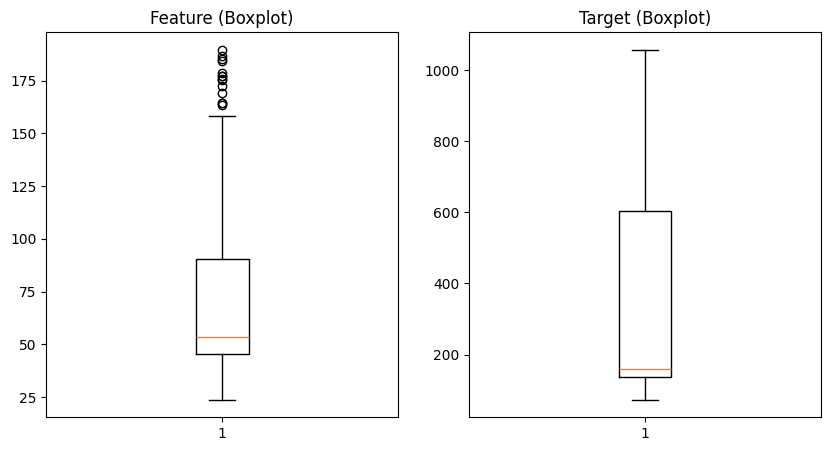

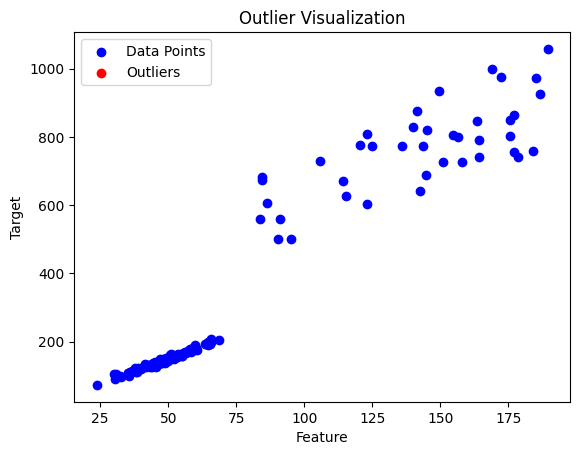

In [50]:
# Outlier Detection
from scipy.stats import zscore

# Detecting outliers using Z-Score
data['Feature_ZScore'] = zscore(data['Feature'])
data['Target_ZScore'] = zscore(data['Target'])

# Marking the outliers
outliers = data[(np.abs(data['Feature_ZScore']) > 3) | (np.abs(data['Target_ZScore']) > 3)]

# Visualizing with boxplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['Feature'])
plt.title('Feature (Boxplot)')

plt.subplot(1, 2, 2)
plt.boxplot(data['Target'])
plt.title('Target (Boxplot)')

plt.show()

# Scatter plot for outlier visualization
plt.scatter(data['Feature'], data['Target'], color='blue', label='Data Points')
plt.scatter(outliers['Feature'], outliers['Target'], color='red', label='Outliers')
plt.title('Outlier Visualization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


# Model Creation and Evaluation

In [45]:
# Model Creation 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Creating the model
model = LinearRegression()

# Splitting the data into training and testing sets
X_train = data[['Feature']]
y_train = data['Target']

# Training the model
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_train)

# Evaluating the model performance
mse_initial = mean_squared_error(y_train, y_pred)
mae_initial = mean_absolute_error(y_train, y_pred)
r2_initial = r2_score(y_train, y_pred)
rmse_initial = np.sqrt(mse_initial)

print(f"Initial Model MSE: {mse_initial}")
print(f"Initial Model MAE: {mae_initial}")
print(f"Initial Model R²: {r2_initial}")
print(f"Initial Model RMSE: {rmse_initial}")


Initial Model MSE: 6111.137184365619
Initial Model MAE: 51.70845007340658
Initial Model R²: 0.9262564797672065
Initial Model RMSE: 78.17376276197544


# Outlier Treatment

In [42]:
# Outlier Treatment using Winsorization
from scipy.stats.mstats import winsorize

# Applying Winsorization (capping the extreme values)
data['Feature_Winsorized'] = winsorize(data['Feature'], limits=[0.05, 0.05])  # 5% cap on both ends
data['Target_Winsorized'] = winsorize(data['Target'], limits=[0.05, 0.05])

# Re-training the model with winsorized data
X_train_winsorized = data[['Feature_Winsorized']]
y_train_winsorized = data['Target_Winsorized']
model.fit(X_train_winsorized, y_train_winsorized)

# Predicting with winsorized data
y_pred_winsorized = model.predict(X_train_winsorized)

# Evaluating the performance of the model after outlier treatment
mse_winsorized = mean_squared_error(y_train_winsorized, y_pred_winsorized)
mae_winsorized = mean_absolute_error(y_train_winsorized, y_pred_winsorized)
r2_winsorized = r2_score(y_train_winsorized, y_pred_winsorized)
rmse_winsorized = np.sqrt(mse_winsorized)

print(f"Winsorized Model MSE: {mse_winsorized}")
print(f"Winsorized Model MAE: {mae_winsorized}")
print(f"Winsorized Model R²: {r2_winsorized}")
print(f"Winsorized Model RMSE: {rmse_winsorized}")


Winsorized Model MSE: 5569.453778560082
Winsorized Model MAE: 47.98744312339129
Winsorized Model R²: 0.9272556268737769
Winsorized Model RMSE: 74.62877312779624


# Comparison of Models

In [44]:

print(f"Change in MSE: {mse_initial - mse_winsorized}")
print(f"Change in MAE: {mae_initial - mae_winsorized}")
print(f"Change in R²: {r2_winsorized - r2_initial}")
print(f"Change in RMSE: {rmse_initial - rmse_winsorized}")


Change in MSE: 541.6834058055365
Change in MAE: 3.721006950015294
Change in R²: 0.0009991471065704527
Change in RMSE: 3.5449896341792027
